<a href="https://colab.research.google.com/github/ervianaa/penjualan-mobil-KNN/blob/main/TugasKNN_LiaBektiErviana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("penjualan_mobil.csv", sep=";")
print(dataset.head())

   Tahun_Produksi  Kilometer  Harga_Mobil  Jumlah_Pemilik  Umur_Mobil  Laku
0            2006     196892       293548               1          17     0
1            2019      72623       228047               3          17     0
2            2014      85450       333501               2          20     1
3            2010     103426       169121               1          16     1
4            2007     127845       127505               2          22     0


In [3]:
x = dataset.iloc[:, [0, 1]].values  # Mengambil kolom Tahun_Produksi dan Kilometer
y = dataset.iloc[:, -1].values      # Mengambil kolom Laku

In [4]:
print(x)

[[  2006 196892]
 [  2019  72623]
 [  2014  85450]
 [  2010 103426]
 [  2007 127845]
 [  2020 163371]
 [  2006  53585]
 [  2018 119225]
 [  2022  74044]
 [  2010 183629]
 [  2010 190152]
 [  2020 119556]
 [  2003  12693]
 [  2007 105259]
 [  2002  35939]
 [  2021 189997]
 [  2020 184013]
 [  2001 162906]
 [  2011  28047]
 [  2005  36105]
 [  2001  85766]
 [  2020 156779]
 [  2000 163048]
 [  2011  54262]
 [  2021 135117]
 [  2011  33776]
 [  2016 171152]
 [  2009 138376]
 [  2015 147848]
 [  2014 102787]
 [  2014 137948]
 [  2018  65016]
 [  2011 150546]
 [  2022 199125]
 [  2019  31959]
 [  2002 146602]
 [  2004 129101]
 [  2018  13748]
 [  2006  23545]
 [  2020 137659]
 [  2008 175838]
 [  2006  83530]
 [  2017 103557]
 [  2003  71087]
 [  2013  78840]
 [  2017 128451]
 [  2008 195456]
 [  2020  61005]
 [  2001 187648]
 [  2019  49353]
 [  2014  62733]
 [  2006  75318]
 [  2011 164736]
 [  2007  77172]
 [  2014 103264]
 [  2002  36736]
 [  2013 122859]
 [  2016 122181]
 [  2003 14192

In [5]:
print(y)

[0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1
 0 1]


In [6]:
print(len(x))

150


In [7]:
print(len(y))

150


In [8]:
from sklearn.model_selection import train_test_split
x_latih, x_tes, y_latih, y_tes = train_test_split(x, y, test_size=0.25, random_state=0)

In [9]:
print(x_tes)

[[  2022 130975]
 [  2001  65680]
 [  2022 199125]
 [  2006 122561]
 [  2018 119225]
 [  2002  81295]
 [  2008 175838]
 [  2012  96202]
 [  2007 193155]
 [  2009 128906]
 [  2014  16295]
 [  2006  75318]
 [  2013  35342]
 [  2014 103264]
 [  2005 187789]
 [  2018  13748]
 [  2022  99045]
 [  2000  59811]
 [  2017 128451]
 [  2020 184013]
 [  2002 113727]
 [  2003 167381]
 [  2021 135117]
 [  2022  74044]
 [  2013 184088]
 [  2000 163048]
 [  2013  78840]
 [  2018 143983]
 [  2000 122547]
 [  2016 171152]
 [  2012  69040]
 [  2014 103384]
 [  2009 138376]
 [  2002  17400]
 [  2006  76690]
 [  2017 100084]
 [  2011  28047]
 [  2017 166256]]


In [10]:
print(len(x_latih))

112


In [11]:
print(len(x_tes))

38


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_latih = sc.fit_transform(x_latih)
x_tes = sc.transform(x_tes)

In [13]:
print (x_latih)

[[-1.11799905e+00 -1.61529396e+00]
 [-3.35399716e-01 -7.17864895e-01]
 [-1.58755865e+00  9.62229296e-01]
 [ 6.03719488e-01 -3.65197203e-01]
 [ 1.38631882e+00  3.85801301e-01]
 [-1.11799905e+00 -6.29018352e-01]
 [-2.23599810e-02  1.55798054e+00]
 [-4.91919583e-01  1.36590523e+00]
 [-9.61479185e-01  2.23721107e-01]
 [ 1.85587843e+00  1.63643074e+00]
 [-4.91919583e-01  6.94110010e-01]
 [-3.35399716e-01 -8.83104403e-01]
 [ 1.34159886e-01  5.82979179e-02]
 [ 6.03719488e-01  4.69357828e-01]
 [ 4.47199621e-01  3.21935386e-01]
 [ 1.54283869e+00  2.70853675e-01]
 [-1.27451892e+00 -1.36658977e+00]
 [-3.35399716e-01 -1.66843290e+00]
 [-3.35399716e-01 -1.02766142e+00]
 [ 2.90679753e-01  5.64467897e-01]
 [ 6.03719488e-01 -7.82465534e-01]
 [ 6.03719488e-01  7.03441009e-01]
 [ 1.54283869e+00  1.42989972e+00]
 [ 6.03719488e-01  5.99091782e-01]
 [-1.27451892e+00  9.83954997e-02]
 [ 1.34159886e-01  5.31148147e-01]
 [ 1.69935856e+00 -8.16887370e-01]
 [ 2.90679753e-01 -6.29316013e-02]
 [-6.48439450e-01  7

In [14]:
print (x_tes)

[[ 1.85587843  0.47101096]
 [-1.43103879 -0.72833472]
 [ 1.85587843  1.72279758]
 [-0.64843945  0.31646169]
 [ 1.22979896  0.25518568]
 [-1.27451892 -0.4415167 ]
 [-0.33539972  1.29505943]
 [ 0.29067975 -0.16770329]
 [-0.49191958  1.61313997]
 [-0.17887985  0.43300734]
 [ 0.60371949 -1.63544378]
 [-0.64843945 -0.55130288]
 [ 0.44719962 -1.28558641]
 [ 0.60371949 -0.03798771]
 [-0.80495932  1.5145767 ]
 [ 1.22979896 -1.68222735]
 [ 1.85587843 -0.11548276]
 [-1.58755865 -0.83613715]
 [ 1.07327909  0.42464985]
 [ 1.54283869  1.44521872]
 [-1.27451892  0.15419781]
 [-1.11799905  1.13972033]
 [ 1.69935856  0.54709167]
 [ 1.85587843 -0.57470385]
 [ 0.44719962  1.44659633]
 [-1.58755865  1.06013132]
 [ 0.44719962 -0.4866104 ]
 [ 1.22979896  0.70994332]
 [-1.58755865  0.31620454]
 [ 0.91675922  1.20898647]
 [ 0.29067975 -0.66661787]
 [ 0.60371949 -0.03578354]
 [-0.17887985  0.60695333]
 [-1.27451892 -1.61514702]
 [-0.64843945 -0.52610184]
 [ 1.07327909 -0.0963983 ]
 [ 0.13415989 -1.41958176]
 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [16]:
y_prediksi = classifier.predict(x_tes)

In [17]:
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_tes, y_prediksi)
print(hasil_cm)

[[13  9]
 [ 8  8]]


In [19]:
from sklearn.metrics import accuracy_score # melakukan evaluasi dengan accuracy score
print(accuracy_score(y_tes, y_prediksi))
print("Tingkat akurasi:", accuracy_score(y_tes, y_prediksi) * 100, "%")

0.5526315789473685
Tingkat akurasi: 55.26315789473685 %


<ipython-input-21-1abbe0cdfdb6>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1], c=ListedColormap(('red', 'green'))(g), label=h)


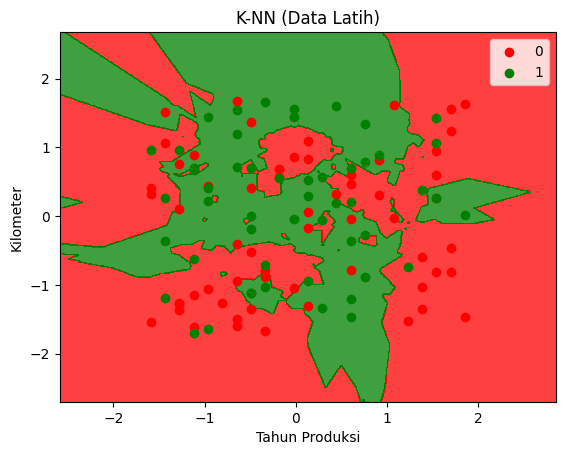

In [21]:
from matplotlib.colors import ListedColormap
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min() - 1, stop=x_data[:, 0].max() + 1, step=0.01),
                           np.arange(start=x_data[:, 1].min() - 1, stop=x_data[:, 1].max() + 1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_tes)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1], c=ListedColormap(('red', 'green'))(g), label=h)
plt.title('K-NN (Data Latih)')
plt.xlabel('Tahun Produksi')
plt.ylabel('Kilometer')
plt.legend()
plt.show()

<ipython-input-22-3174d0ecf387>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1], c=ListedColormap(('red', 'green'))(g), label=h)


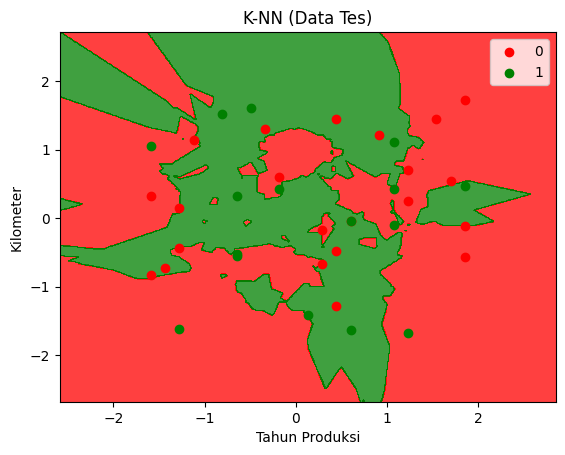

In [22]:
from matplotlib.colors import ListedColormap
x_data, y_data = x_tes, y_tes
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min() - 1, stop=x_data[:, 0].max() + 1, step=0.01),
                           np.arange(start=x_data[:, 1].min() - 1, stop=x_data[:, 1].max() + 1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_tes)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1], c=ListedColormap(('red', 'green'))(g), label=h)
plt.title('K-NN (Data Tes)')
plt.xlabel('Tahun Produksi')
plt.ylabel('Kilometer')
plt.legend()
plt.show()